In [14]:
%load_ext autoreload
%autoreload 2

# Control figure size
figsize=(14, 4)

from util import util
import os
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, confusion_matrix
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import permutation_importance
import numpy as np
import pandas as pd
import xgboost
data_folder = os.path.join('../..', 'data')
file_name = "DataForModel"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
data = util.load_data(data_folder, file_name)
data = data[data['Div'] == 'I1']
data.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,Season,ELO diff,Home_prob_ELO,Draw_prob_ELO,...,Diff_shots_on_target_attempted,Diff_shots_on_target_allowed,Diff_shots_attempted,Diff_shots_allowed,Diff_corners_awarded,Diff_corners_conceded,Diff_fouls_commited,Diff_fouls_suffered,Diff_yellow_cards,Diff_red_cards
328,I1,2005-10-01,Chievo,Treviso,0.0,0.0,0506,91.498743,0.614877,0.156396,...,9,1,5,5,10,0,-6,-2,-1,0
329,I1,2005-10-01,Udinese,Lazio,3.0,0.0,0506,-42.696868,0.385797,0.249424,...,7,-1,7,-7,-6,-8,17,-4,7,1
330,I1,2005-10-02,Ascoli,Parma,3.0,1.0,0506,4.420229,0.470086,0.215194,...,-6,-10,-15,-9,-9,-7,-6,-7,-1,2
331,I1,2005-10-02,Fiorentina,Livorno,3.0,2.0,0506,-8.833139,0.446603,0.224731,...,13,7,12,25,4,3,12,28,2,0
332,I1,2005-10-02,Juventus,Inter,2.0,0.0,0506,29.593984,0.513877,0.197411,...,-9,-13,-16,-14,-4,-1,15,-1,0,0


In [28]:
X,y = util.prepare_binary_data(data)
X

,ELO diff,Diff_goals_scored,Diff_goals_conceded,Matchrating,Diff_points,Diff_change_in_ELO,Diff_opposition_mean_ELO,Diff_shots_on_target_attempted,Diff_shots_on_target_allowed,Diff_shots_attempted,Diff_shots_allowed,Diff_corners_awarded,Diff_corners_conceded,Diff_fouls_commited,Diff_fouls_suffered,Diff_yellow_cards,Diff_red_cards
328,91.498743,5,-7,12,9,91.498743,-10.239905,9,1,5,5,10,0,-6,-2,-1,0
329,-42.696868,-5,1,-6,-4,-42.696868,3.109817,7,-1,7,-7,-6,-8,17,-4,7,1
330,4.420229,-1,-2,1,-1,4.420229,1.475494,-6,-10,-15,-9,-9,-7,-6,-7,-1,2
331,-8.833139,6,6,0,-1,-8.833139,12.548366,13,7,12,25,4,3,12,28,2,0
332,29.593984,0,-1,1,3,29.593984,-12.482125,-9,-13,-16,-14,-4,-1,15,-1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28559,-185.454893,-5,-1,-4,-3,-10.959076,-26.296944,-18,-11,-33,-25,-8,7,33,16,7,0
28560,-50.590040,-2,0,-2,2,5.564420,-27.361494,11,-4,19,6,9,-17,-16,-4,-3,0
28561,236.326333,4,-9,13,8,26.857210,-13.370149,8,-4,16,-4,-1,-4,19,4,7,-1
28562,-344.711290,-4,2,-6,-1,42.061391,-30.857861,-2,-9,-13,6,1,1,42,9,10,0


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [31]:
base_est = LogisticRegression(penalty='l1', solver='saga')
param_grid={'C': 1. / np.linspace(1e-1, 1e4, 100)}
gscv = GridSearchCV(base_est, param_grid=param_grid, scoring='roc_auc')
gscv.fit(X_train, y_train)
lr, lr_params = gscv.best_estimator_, gscv.best_params_

/Users/heiken/Desktop/NTNU/4. klasse/Artificial Intelligence in Industry/Match Predictor/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/heiken/Desktop/NTNU/4. klasse/Artificial Intelligence in Industry/Match Predictor/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/heiken/Desktop/NTNU/4. klasse/Artificial Intelligence in Industry/Match Predictor/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [32]:
lr_score_cv, lr_score_test = gscv.best_score_, roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1])
print(f'AUC score for C={lr_params["C"]:.2f}: {lr_score_cv:.2f} (cross-validation), {lr_score_test:.2f} (test)')

AUC score for C=0.01: 0.71 (cross-validation), 0.70 (test)


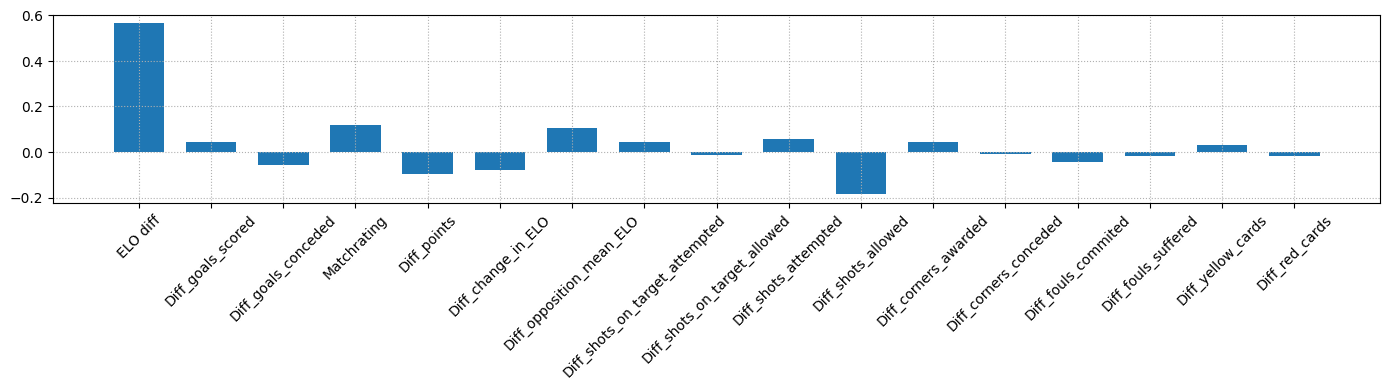

In [8]:
lr_coefs = pd.Series(index=X.columns, data=lr.coef_[0])
util.plot_bars(lr_coefs, figsize=figsize)

In [9]:
base_est = xgboost.XGBClassifier(tree_method='hist', importance_type='total_gain')
param_grid={'max_depth': [2, 3, 4], 'n_estimators': list(range(20, 41, 5)), 'reg_lambda': np.linspace(0, 500, 6)}
gscv = GridSearchCV(base_est, param_grid=param_grid)
gscv.fit(X, y)
xbm, xbm_params = gscv.best_estimator_, gscv.best_params_

In [10]:
xbm_score_cv, xbm_score_test = gscv.best_score_, roc_auc_score(y_test, xbm.predict(X_test))
print(f'AUC score for {xbm_params}: {xbm_score_cv:.2f} (cross-val.), {xbm_score_test:.2f} (test)')

AUC score for {'max_depth': 4, 'n_estimators': 25, 'reg_lambda': np.float64(300.0)}: 0.66 (cross-val.), 0.50 (test)


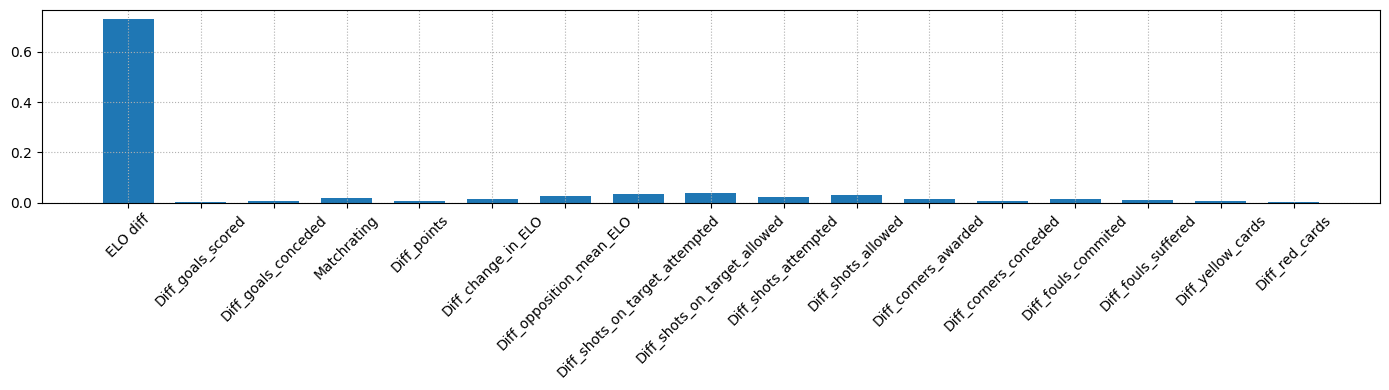

In [11]:
xbm_imp = pd.Series(index=X.columns, data=xbm.feature_importances_)
util.plot_bars(xbm_imp, figsize=figsize)

/var/folders/1k/pyn04stx4cv8pm3wp53v74r80000gn/T/ipykernel_12215/3116684602.py:4: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()


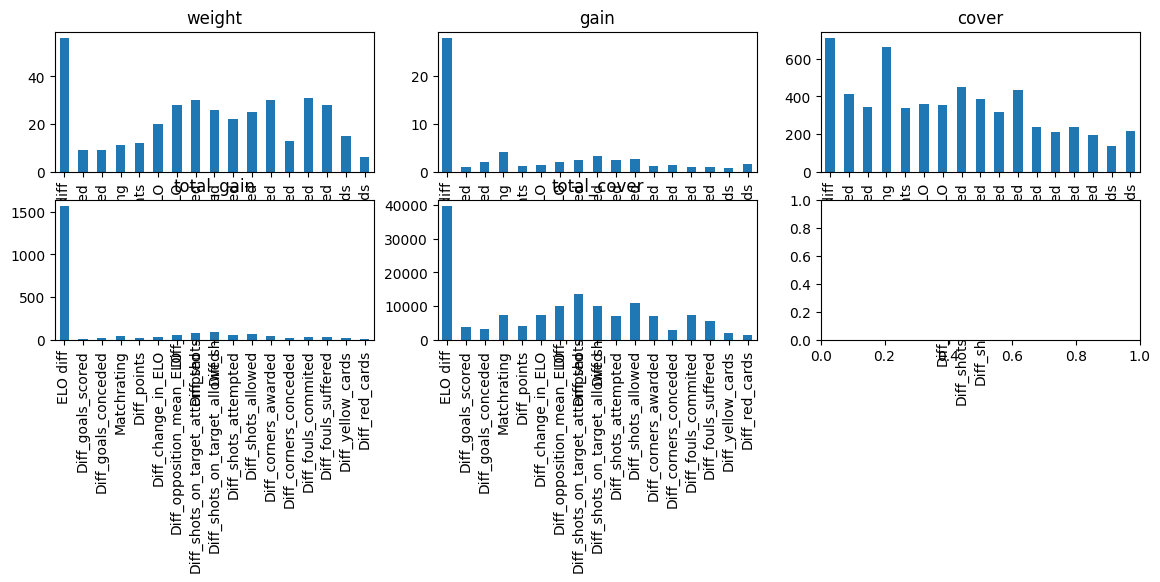

In [12]:
_, axes = plt.subplots(nrows=2, ncols=3, figsize=figsize)
for ax, imp_type in zip(axes.ravel(), ['weight', 'gain', 'cover', 'total_gain', 'total_cover']):
    pd.Series(xbm.get_booster().get_score(importance_type=imp_type)).plot.bar(ax=ax, title=imp_type)
plt.tight_layout()

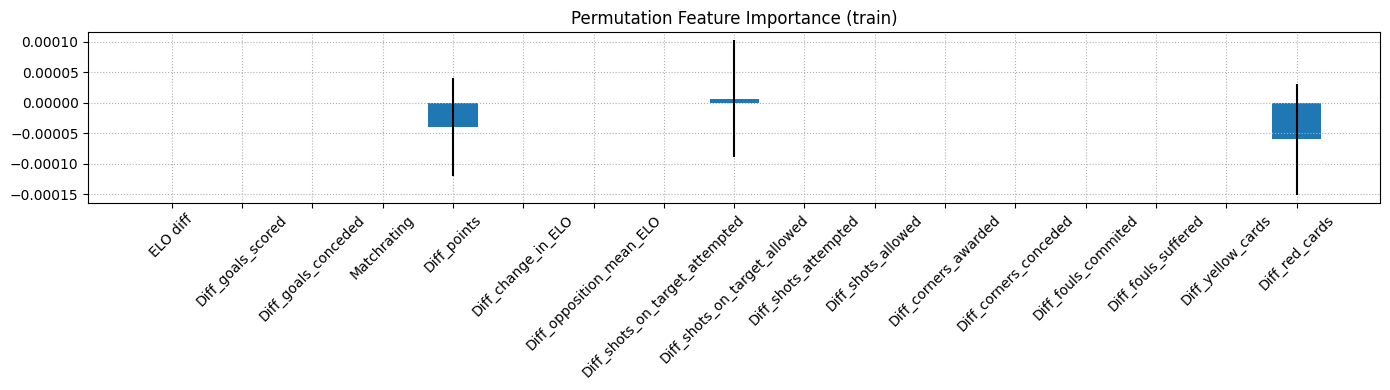

In [13]:
r_train = permutation_importance(xbm, X_train, y_train, n_repeats=30, random_state=42)
xbm_p_imp = pd.Series(index=X.columns, data=r_train.importances_mean)
util.plot_bars(xbm_p_imp, figsize=figsize, std=r_train.importances_std, title='Permutation Feature Importance (train)')

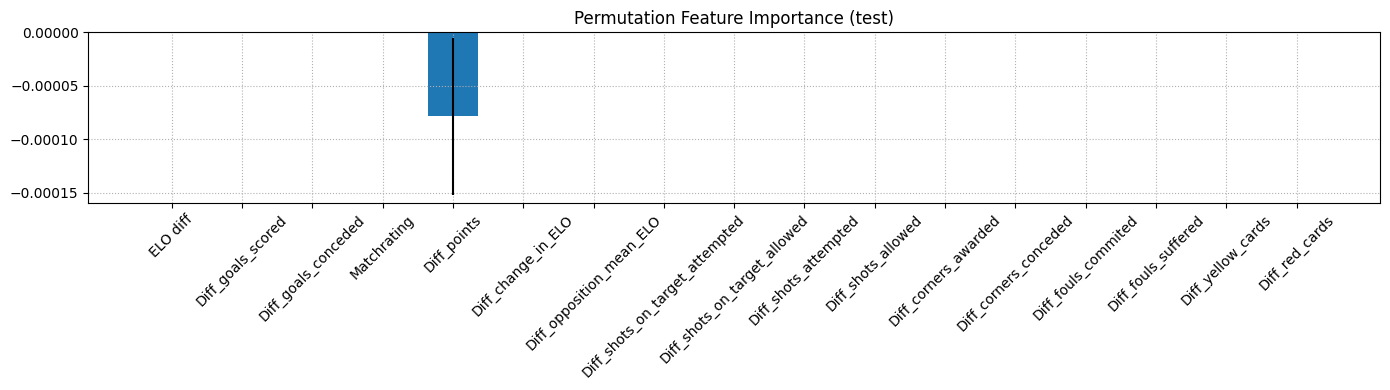

In [65]:
r_test = permutation_importance(xbm, X_test, y_test, n_repeats=30, random_state=42)
xbm_p_imp = pd.Series(index=X.columns, data=r_test.importances_mean)
util.plot_bars(xbm_p_imp, figsize=figsize, std=r_test.importances_std, title='Permutation Feature Importance (test)')